<a href="https://colab.research.google.com/github/lihui1625/deepleaning/blob/main/d2l_P02_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install d2l

In [3]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [4]:
fair_probs = torch.ones([6])/6
fair_probs

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])

In [6]:
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 1., 0., 0., 0.])

In [7]:
multinomial.Multinomial(2, fair_probs).sample()

tensor([0., 0., 1., 0., 1., 0.])

In [8]:
multinomial.Multinomial(20, fair_probs).sample()

tensor([5., 3., 3., 2., 5., 2.])

In [9]:
multinomial.Multinomial(2000, fair_probs).sample()

tensor([368., 327., 344., 330., 315., 316.])

In [10]:
multinomial.Multinomial(2000, fair_probs).sample()/2000

tensor([0.1620, 0.1680, 0.1650, 0.1635, 0.1615, 0.1800])

In [11]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
counts


tensor([[1., 3., 0., 2., 3., 1.],
        [3., 1., 3., 2., 0., 1.],
        [1., 2., 2., 2., 2., 1.],
        ...,
        [3., 0., 2., 3., 1., 1.],
        [3., 3., 0., 2., 1., 1.],
        [2., 2., 2., 1., 3., 0.]])

In [12]:
cum_counts = counts.cumsum(dim=0)
cum_counts

tensor([[  1.,   3.,   0.,   2.,   3.,   1.],
        [  4.,   4.,   3.,   4.,   3.,   2.],
        [  5.,   6.,   5.,   6.,   5.,   3.],
        ...,
        [858., 817., 799., 836., 862., 808.],
        [861., 820., 799., 838., 863., 809.],
        [863., 822., 801., 839., 866., 809.]])

In [ ]:
cum_counts_sum = cum_counts.sum(dim=1, keepdims=True)
cum_counts_sum

In [14]:
estimates = cum_counts / cum_counts_sum
estimates

tensor([[0.1000, 0.3000, 0.0000, 0.2000, 0.3000, 0.1000],
        [0.2000, 0.2000, 0.1500, 0.2000, 0.1500, 0.1000],
        [0.1667, 0.2000, 0.1667, 0.2000, 0.1667, 0.1000],
        ...,
        [0.1723, 0.1641, 0.1604, 0.1679, 0.1731, 0.1622],
        [0.1725, 0.1643, 0.1601, 0.1679, 0.1729, 0.1621],
        [0.1726, 0.1644, 0.1602, 0.1678, 0.1732, 0.1618]])

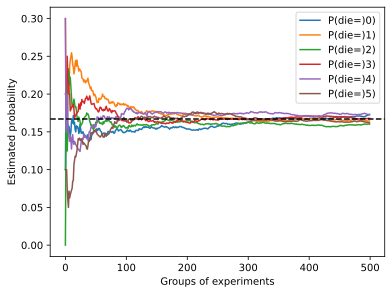

In [19]:
d2l.set_figsize((6, 4.5))
for i in range(6):
  d2l.plt.plot(estimates[:,i].numpy(), label=("P(die=)" + str(i) + ")"))

d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

In [20]:
print(dir(torch.distributions))


['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'CumulativeDistributionTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'InverseGamma', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PositiveDefiniteTransform', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'SoftplusTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'Transform

In [21]:
help(torch.ones)


Help on built-in function ones in module torch:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_dtype`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None``, us